https://filterpy.readthedocs.io/en/latest/kalman/KalmanFilter.html

https://www.kalmanfilter.net/multiExamples.html -> Example9

In [ ]:
!pip install filterpy

     |████████████████████████████████| 177 kB 20.4 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=98c2c6510b7b7f00de80dfd615a4b6c434c7fb2e0eb7ac4d195ec0dd293b35e4
  Stored in directory: /root/.cache/pip/wheels/ce/e0/ee/a2b3c5caab3418c1ccd8c4de573d4cbe13315d7e8b0a55fbc2
Successfully built filterpy


In [ ]:
import numpy as np
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

In [ ]:
kf = KalmanFilter(dim_x=6, dim_z=2)
kf

KalmanFilter object
dim_x = 6
dim_z = 2
dim_u = 0
x = [[0. 0. 0. 0. 0. 0.]].T
P = [[1. 0. 0. 0. 0. 0.]
     [0. 1. 0. 0. 0. 0.]
     [0. 0. 1. 0. 0. 0.]
     [0. 0. 0. 1. 0. 0.]
     [0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 1.]]
x_prior = [[0. 0. 0. 0. 0. 0.]].T
P_prior = [[1. 0. 0. 0. 0. 0.]
           [0. 1. 0. 0. 0. 0.]
           [0. 0. 1. 0. 0. 0.]
           [0. 0. 0. 1. 0. 0.]
           [0. 0. 0. 0. 1. 0.]
           [0. 0. 0. 0. 0. 1.]]
x_post = [[0. 0. 0. 0. 0. 0.]].T
P_post = [[1. 0. 0. 0. 0. 0.]
          [0. 1. 0. 0. 0. 0.]
          [0. 0. 1. 0. 0. 0.]
          [0. 0. 0. 1. 0. 0.]
          [0. 0. 0. 0. 1. 0.]
          [0. 0. 0. 0. 0. 1.]]
F = [[1. 0. 0. 0. 0. 0.]
     [0. 1. 0. 0. 0. 0.]
     [0. 0. 1. 0. 0. 0.]
     [0. 0. 0. 1. 0. 0.]
     [0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 1.]]
Q = [[1. 0. 0. 0. 0. 0.]
     [0. 1. 0. 0. 0. 0.]
     [0. 0. 1. 0. 0. 0.]
     [0. 0. 0. 1. 0. 0.]
     [0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 1.]]
R = [[1. 0.]
     [0. 1.]]
H = [[0

### 1. State Transition Matrix(state extrapolation)
->F

In [ ]:
kf.F = np.array([
    [1, 1, 0.5, 0, 0, 0], 
    [0, 1, 1, 0, 0, 0], 
    [0, 0, 1, 0, 0, 0], 
    [0, 0, 0, 1, 1, 0.5], 
    [0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 1]
])

### 2. Process noise matrix
->Q

In [ ]:
kf.Q = np.array([
    [0.25, 0.5, 0.5, 0, 0, 0], 
    [0.5, 1, 1, 0, 0, 0], 
    [0.5, 1, 1, 0, 0, 0], 
    [0, 0, 0, 0.25, 0.5, 0.5],
    [0, 0, 0, 0.5, 1, 1],
    [0, 0, 0, 0.5, 1, 1]
])
kf.Q *= 0.5**2

### 3. Measurement uncertainty
->$R_n$

In [ ]:
kf.R = np.array([[9, 0], [0, 9]])

### 4. Measurement function
-> H

In [ ]:
kf.H = np.array([[1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0]])

### 5. Initalization
-> $\hat{x}_{0,0},P_{0,0}$

In [ ]:
kf.x = np.array([0, 0, 0, 0, 0, 0])
kf.P = np.array([
    [500, 0, 0, 0, 0, 0],
    [0, 500, 0, 0, 0, 0],
    [0, 0, 500, 0, 0, 0],
    [0, 0, 0, 500, 0, 0],
    [0, 0, 0, 0, 500, 0],
    [0, 0, 0, 0, 0, 500],
])

In [ ]:
kf

KalmanFilter object
dim_x = 6
dim_z = 2
dim_u = 0
x = [0 0 0 0 0 0]
P = [[500   0   0   0   0   0]
     [  0 500   0   0   0   0]
     [  0   0 500   0   0   0]
     [  0   0   0 500   0   0]
     [  0   0   0   0 500   0]
     [  0   0   0   0   0 500]]
x_prior = [[0. 0. 0. 0. 0. 0.]].T
P_prior = [[1. 0. 0. 0. 0. 0.]
           [0. 1. 0. 0. 0. 0.]
           [0. 0. 1. 0. 0. 0.]
           [0. 0. 0. 1. 0. 0.]
           [0. 0. 0. 0. 1. 0.]
           [0. 0. 0. 0. 0. 1.]]
x_post = [[0. 0. 0. 0. 0. 0.]].T
P_post = [[1. 0. 0. 0. 0. 0.]
          [0. 1. 0. 0. 0. 0.]
          [0. 0. 1. 0. 0. 0.]
          [0. 0. 0. 1. 0. 0.]
          [0. 0. 0. 0. 1. 0.]
          [0. 0. 0. 0. 0. 1.]]
F = [[1.  1.  0.5 0.  0.  0. ]
     [0.  1.  1.  0.  0.  0. ]
     [0.  0.  1.  0.  0.  0. ]
     [0.  0.  0.  1.  1.  0.5]
     [0.  0.  0.  0.  1.  1. ]
     [0.  0.  0.  0.  0.  1. ]]
Q = [[0.0625 0.125  0.125  0.     0.     0.    ]
     [0.125  0.25   0.25   0.     0.     0.    ]
     [0.125  0.25   0.25 

## Predict

In [ ]:
kf.predict()
kf

KalmanFilter object
dim_x = 6
dim_z = 2
dim_u = 0
x = [0. 0. 0. 0. 0. 0.]
P = [[1125.0625  750.125   250.125     0.        0.        0.    ]
     [ 750.125  1000.25    500.25      0.        0.        0.    ]
     [ 250.125   500.25    500.25      0.        0.        0.    ]
     [   0.        0.        0.     1125.0625  750.125   250.125 ]
     [   0.        0.        0.      750.125  1000.25    500.25  ]
     [   0.        0.        0.      250.125   500.25    500.25  ]]
x_prior = [0. 0. 0. 0. 0. 0.]
P_prior = [[1125.0625  750.125   250.125     0.        0.        0.    ]
           [ 750.125  1000.25    500.25      0.        0.        0.    ]
           [ 250.125   500.25    500.25      0.        0.        0.    ]
           [   0.        0.        0.     1125.0625  750.125   250.125 ]
           [   0.        0.        0.      750.125  1000.25    500.25  ]
           [   0.        0.        0.      250.125   500.25    500.25  ]]
x_post = [[0. 0. 0. 0. 0. 0.]].T
P_post = [[1. 0. 0. 0

## Update

In [ ]:
kf.update(np.array([-393.66, 300.4]))
kf

KalmanFilter object
dim_x = 6
dim_z = 2
dim_u = 0
x = [-390.53588647 -260.38618462  -86.82432185  298.01600441  198.69941031
       66.2552108 ]
P = [[  8.92857537   5.95304492   1.98500964   0.           0.
        0.        ]
     [  5.95304492 504.08024249 334.80496004   0.           0.
        0.        ]
     [  1.98500964 334.80496004 445.08327363   0.           0.
        0.        ]
     [  0.           0.           0.           8.92857537   5.95304492
        1.98500964]
     [  0.           0.           0.           5.95304492 504.08024249
      334.80496004]
     [  0.           0.           0.           1.98500964 334.80496004
      445.08327363]]
x_prior = [0. 0. 0. 0. 0. 0.]
P_prior = [[1125.0625  750.125   250.125     0.        0.        0.    ]
           [ 750.125  1000.25    500.25      0.        0.        0.    ]
           [ 250.125   500.25    500.25      0.        0.        0.    ]
           [   0.        0.        0.     1125.0625  750.125   250.125 ]
          

In [ ]:
print('*************state*************')
print(kf.x)
print('*************location*************')
print(kf.y)
print('*************Kalman Gain*************')
print(kf.K)
print('*************Covariance matrix*************')
print(kf.P)

*************state*************
[-390.53588647 -260.38618462  -86.82432185  298.01600441  198.69941031
   66.2552108 ]
*************location*************
[-393.66  300.4 ]
*************Kalman Gain*************
[[0.99206393 0.        ]
 [0.66144944 0.        ]
 [0.22055663 0.        ]
 [0.         0.99206393]
 [0.         0.66144944]
 [0.         0.22055663]]
*************Covariance matrix*************
[[  8.92857537   5.95304492   1.98500964   0.           0.
    0.        ]
 [  5.95304492 504.08024249 334.80496004   0.           0.
    0.        ]
 [  1.98500964 334.80496004 445.08327363   0.           0.
    0.        ]
 [  0.           0.           0.           8.92857537   5.95304492
    1.98500964]
 [  0.           0.           0.           5.95304492 504.08024249
  334.80496004]
 [  0.           0.           0.           1.98500964 334.80496004
  445.08327363]]


## Implement

In [ ]:
kf = KalmanFilter(dim_x=6, dim_z=2)

# Variables
kf.F = np.array([[1,1,0.5,0,0,0],[0,1,1,0,0,0],[0,0,1,0,0,0],[0,0,0,1,1,0.5],[0,0,0,0,1,1],[0,0,0,0,0,1]])
kf.Q = np.array([[0.25,0.5,0.5,0,0,0],[0.5,1,1,0,0,0],[0.5,1,1,0,0,0],[0,0,0,0.25,0.5,0.5],[0,0,0,0.5,1,1],[0,0,0,0.5,1,1]])
kf.Q *= 0.5**2
kf.R = np.array([[9, 0], [0, 9]])
kf.H = np.array([[1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0]])

# Initalizaiton
kf.x = np.array([0, 0, 0, 0, 0, 0])
kf.P *= 500

# noisy measurements
measurements = np.array([
    [-393.66,  300.4 ],
    [-375.93,  301.78],
    [-351.04,  295.1 ],
    [-328.96,  305.19],
    [-299.35,  301.06],
    [-273.36,  302.05],
    [-245.89,  300.  ],
    [-222.58,  303.57],
    [-198.03,  296.33],
    [-174.17,  297.65],
    [-146.32,  297.41],
    [-123.72,  299.61],
    [-103.47,  299.6 ],
    [ -78.23,  302.39],
    [ -52.63,  295.04],
    [ -23.34,  300.09],
    [  25.96,  294.72],
    [  49.72,  298.61],
    [  76.94,  294.64],
    [  95.38,  284.88],
    [ 119.83,  272.82],
    [ 144.01,  264.93],
    [ 161.84,  251.46],
    [ 180.56,  241.27],
    [ 201.42,  222.98],
    [ 222.62,  203.73],
    [ 239.4 ,  184.1 ],
    [ 252.51,  166.12],
    [ 266.26,  138.71],
    [ 271.75,  119.71],
    [ 277.4 ,  100.41],
    [ 294.12,   79.76],
    [ 301.23,   50.62],
    [ 291.8 ,   32.99],
    [ 299.89,    2.14]
])

In [ ]:
estimates = np.zeros_like(measurements)
kf.predict() # x1, p1

for idx in range(0, len(measurements)):
    m = measurements[idx]    
    kf.update(m)
    estimates[idx,0] = kf.x[0]
    estimates[idx,1] = kf.x[3]
    
    kf.predict()

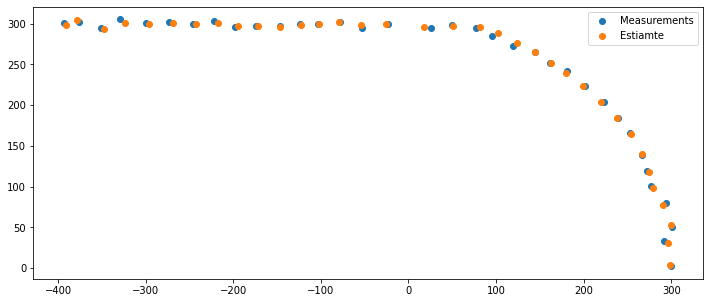

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.scatter(measurements[:,0], measurements[:,1])
plt.scatter(estimates[:,0], estimates[:,1])
plt.legend(['Measurements', 'Estiamte'])